In [1]:
# if you want to temporarily upload the datasets, ignore this
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
#use your own drive path here
#Shubhnoor path
#path = "/content/drive/MyDrive/Colab Notebooks/MMAI 869 - Team Assignment/LoanData/"

#Lauren Path
 path =  "/content/drive/MyDrive/Colab Notebooks/Group Assignment - Zindi Competition/MMAI 869 Team Assignment Shared Google Folder/Dataset - Zindi Loan Default Prediction/"
 pathdata =  "/content/drive/MyDrive/Colab Notebooks/Group Assignment - Zindi Competition/MMAI 869 Team Assignment Shared Google Folder/Data Cleaning/"


#Andre's Path
#path = "/content/drive/My Drive/Education/Notes/MMAI 869 - Machine Learning and AI Technology/Assignments/Team/MMAI 869 Team Assignment Shared Google Folder/Dataset - Zindi Loan Default Prediction/"

#Sam Xie's Path
#path = "/content/drive/MyDrive/869_datasets/"

#Marc's Path
#path = "/content/drive/MyDrive/Colab Notebooks/Data/"

#Kritin's Path
path = "/content/drive/MyDrive/Colab Notebooks/MMAI 869 - Team Assignment/LoanData/"




IndentationError: ignored

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import numpy as np
import pandas as pd
pd.options.display.max_columns = 100
import matplotlib.pyplot as plt
import seaborn as sn
import random
import datetime as dt

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [5]:
traindemo = pd.read_csv(path + "traindemographics.csv", parse_dates=['birthdate'])
testdemo = pd.read_csv(path + "testdemographics.csv", parse_dates=['birthdate'])
trainperf = pd.read_csv(path + "trainperf.csv", parse_dates=['approveddate','creationdate'])
testperf = pd.read_csv(path + "testperf.csv", parse_dates=['approveddate','creationdate'])
trainprevloans = pd.read_csv(path + "trainprevloans.csv", parse_dates=['approveddate','creationdate','closeddate',
                                                                           'firstduedate','firstrepaiddate'])
testprevloans = pd.read_csv(path + "testprevloans.csv", parse_dates=['approveddate','creationdate','closeddate',
                                                                           'firstduedate','firstrepaiddate'])

FileNotFoundError: ignored

In [ ]:
# Combine train and test demographics - we stack the two df on top of one another because some demo data is missing the way they did the split (e.g. customer id in train perf data is customer id in test demo data)
traindemo = pd.concat([traindemo, testdemo], ignore_index=True)

# Combine train and test previous loans
#trainprevloans = pd.concat([trainprevloans, testprevloans], ignore_index=True)


In [ ]:
print(traindemo.shape)
print(trainprevloans.shape)

In [ ]:
# List of DataFrame names and their corresponding variables
df_names = ['traindemo', 'testdemo', 'trainperf', 'testperf', 'trainprevloans', 'testprevloans']
dfs = [traindemo, testdemo, trainperf, testperf, trainprevloans, testprevloans]

# Iterate through each DataFrame
for name, df in zip(df_names, dfs):
    # Print the number of duplicates
    num_duplicates = df.duplicated().sum()
    print(f"{name} has {num_duplicates} duplicate rows.")

    # Drop duplicates
    df.drop_duplicates(inplace=True)

# Now each DataFrame in the list 'dfs' has duplicates removed

In [ ]:
# List of DataFrame names and their corresponding variables
df_names = ['traindemo', 'testdemo', 'trainperf', 'testperf', 'trainprevloans', 'testprevloans']
dfs = [traindemo, testdemo, trainperf, testperf, trainprevloans, testprevloans]

# Check for duplicates in each DataFrame
for name, df in zip(df_names, dfs):
    # Count duplicates
    num_duplicates = df.duplicated().sum()

    # Check if duplicates exist
    if num_duplicates == 0:
        print(f"No duplicates found in {name}.")
    else:
        print(f"Warning: {num_duplicates} duplicates found in {name}.")


In [ ]:
print(traindemo.shape)
print(trainprevloans.shape)

### Merge Train DF on demographic + current loans (traindemo, trainperf)

In [ ]:
# Perform a left merge
traindf = trainperf.merge(traindemo, on='customerid')

#check shape after merge
traindf.shape


In [ ]:
traindf.columns

In [ ]:
traindf.info()

In [ ]:
traindf.describe()

In [ ]:
traindf.isnull().sum()

In [ ]:
print("----------")
traindf.employment_status_clients.value_counts()
print("\n----------")
traindf.level_of_education_clients.value_counts()
print("\n----------")
traindf.referredby.value_counts()
print("\n----------")
traindf.bank_account_type.value_counts()

### Filling NaN values

In [ ]:
traindf["employment_status_clients"] = traindf["employment_status_clients"].fillna("Permanent")
traindf["level_of_education_clients"] = traindf["level_of_education_clients"].fillna("Others")
traindf['referredby'] = traindf['referredby'].notnull().astype('int')

In [ ]:
print("----------")
traindf.employment_status_clients.value_counts()
print("\n----------")
traindf.level_of_education_clients.value_counts()
print("\n----------")
traindf.referredby.value_counts()
print("\n----------")
traindf.bank_account_type.value_counts()

### Converting birthdate to Age

In [ ]:
#Calculating Age and adding the new feature to the dataframe - using 2017 as data is from 2017 and we want to get age at time of loan request
traindf['Age'] = 2017 - traindf.birthdate.dt.year

#Dropping the birthdate feature
traindf = traindf.drop(['birthdate'], axis=1)

### Converting target 'good_bad_flag' - categorical to numerical

In [ ]:
goodbad={'Good':1,'Bad':0}
traindf['good_bad_flag']=traindf.good_bad_flag.map(goodbad)

# New Features

In [ ]:
# Check if the column has any duplicates
not traindf['customerid'].duplicated().any()

True

In [ ]:
# Creating a binary column indicating if the employment status is 'Employed'
traindf['employed'] = traindf['employment_status_clients'].isin(['Employed', 'Self-Employed', 'Contract']).astype(int)

In [ ]:
# Creating a binary column indicating if the customer provided education information
traindf['no_education_info'] = (traindf['level_of_education_clients'] == 'Others').astype(int)

In [ ]:
# Binning the loan amounts into categories
bins = [0, 10000, 20000, 60000, float('inf')]
labels = ['Low', 'Medium', 'High', 'Very High']
traindf['loan_amount_category'] = pd.cut(traindf['loanamount'], bins=bins, labels=labels)

In [ ]:
# Creating a binary column indicating if the customer has a specific bank account type
traindf['is_savings_account'] = (traindf['bank_account_type'] == 'Savings').astype(int)

In [ ]:
# Calculating the ratio of loan amount to total due
traindf['loan_amount_to_total_due_ratio'] = traindf['loanamount'] / traindf['totaldue']

In [ ]:
# Calculating the total amount payable per day of the loan term
traindf['daily_payment'] = traindf['totaldue'] / traindf['termdays']

In [ ]:
# Creating a binary column for whether the bank branch information is available
traindf['has_branch_info'] = traindf['bank_branch_clients'].notnull().astype(int)

#Dropping the bank_branch_clients feature
traindf = traindf.drop(['bank_branch_clients'], axis=1)

In [ ]:
# removed for now as the test set is not able to calc this bc of weird format in date columsn
#Calculate the duration between creation date and approved date in hours
# First, find the total duration in seconds and then convert to hours
#traindf['duration_hours'] = (traindf['approveddate'] - traindf['creationdate']).dt.total_seconds() / 3600

In [ ]:
#checking the new column to see stats
#traindf['duration_hours'].describe()

# New Location Feature - Created Clusters using K-Means

In [ ]:
import folium
from folium.plugins import HeatMap
folium_map = folium.Map(location = [6.622782, 3.584222], # Adjust this Lat, Long to a datapoint from your dataset, it marks where the map starts when it is loaded
                        zoom_start = 9) # The zoom indicates how close you want the map to be shown

data_zip = zip(
    traindf['latitude_gps'], # Here it goes your Latitude feature
    traindf['longitude_gps'], # Here it goes your Longitude feature
    traindf['good_bad_flag'] # Here it goes your Target feature
    )
list_of_data_zip = list(data_zip)

hm_layer = HeatMap(list_of_data_zip,
                  min_opacity=0.7,
                  radius=8,
                  blur=15,
                  )

folium_map.add_child(hm_layer)
folium_map

In [ ]:
# Clustering geographical coordinates using K-means
from sklearn.cluster import KMeans, AgglomerativeClustering

from sklearn.metrics import silhouette_score, silhouette_samples

In [ ]:
X = traindf[['customerid', 'longitude_gps', 'latitude_gps']].copy()
X.shape

(4368, 3)

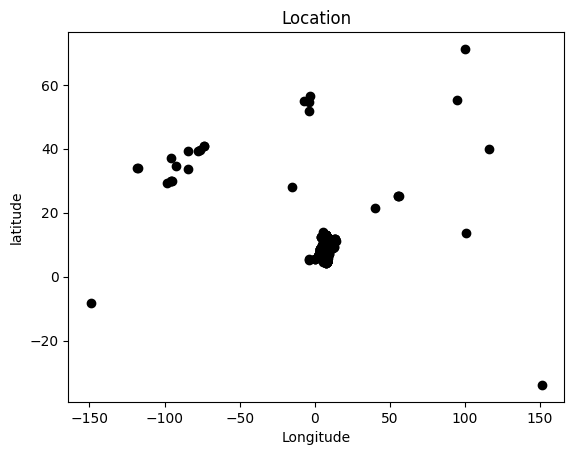

In [ ]:
plt.figure();

plt.scatter(X.iloc[:, 1], X.iloc[:, 2], c="black");
plt.title("Location");
plt.xlabel('Longitude');
plt.ylabel('latitude');
plt.xticks();
plt.yticks();

In [ ]:
k_means = KMeans(n_clusters=6, random_state=42)
k_means.fit(X[['longitude_gps', 'latitude_gps']])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=6, random_state=42)

In [ ]:
# Let's look at the centers
k_means.cluster_centers_

array([[  7.51718887,   7.93920728],
       [-95.28206543,  32.2411339 ],
       [112.57594047,  29.29314774],
       [  3.73072012,   6.76888375],
       [ -6.60133012,  49.21772504],
       [ 51.6831424 ,  24.30925777]])

In [ ]:
silhouette_score(X[['longitude_gps', 'latitude_gps']], k_means.labels_)

0.6670693728236111

Silhouette Score


* n_clusters=4 : 0.6625
* n_clusters=5 : 0.6663162
* n_clusters=6 : 0.6670
* n_clusters=7 : 0.6551



/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


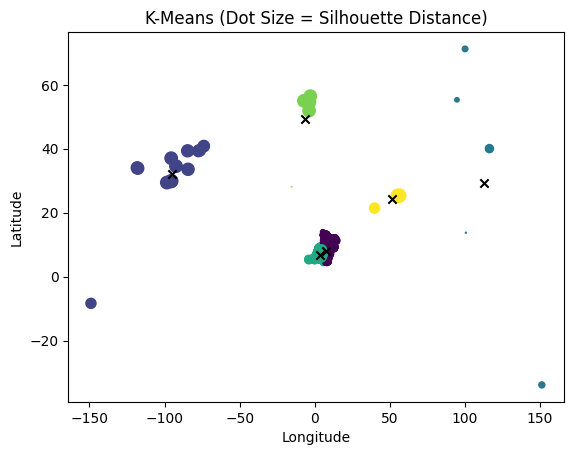

In [ ]:
sample_silhouette_values = silhouette_samples(X[['longitude_gps', 'latitude_gps']], k_means.labels_)
sizes = 100*sample_silhouette_values

plt.figure();

plt.scatter(X.iloc[:, 1], X.iloc[:, 2], s=sizes, c=k_means.labels_)
plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], marker='x', c="black")

plt.title("K-Means (Dot Size = Silhouette Distance)");
plt.xlabel('Longitude');
plt.ylabel('Latitude');

## Hierarchical (Agglomerative) Clustering

In [ ]:
import joblib

In [ ]:
# Choose the number of clusters
num_clusters = 3

# Perform hierarchical clustering
agg = AgglomerativeClustering(n_clusters=num_clusters, affinity='euclidean', linkage='ward', compute_distances=True)
X['location_cluster'] = agg.fit_predict(X[['longitude_gps', 'latitude_gps']])

# Save the clustering model using joblib
model_filename = path + 'hierarchical_clustering_model.joblib'
joblib.dump(agg, model_filename)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


['/content/drive/MyDrive/Colab Notebooks/Group Assignment - Zindi Competition/MMAI 869 Team Assignment Shared Google Folder/Dataset - Zindi Loan Default Prediction/hierarchical_clustering_model.joblib']

Text(0.5, 1.0, 'Silhouette Score for Hierarchical Clustering')

Text(0.5, 0, 'Number of Clusters')

Text(0, 0.5, 'Silhouette Score')

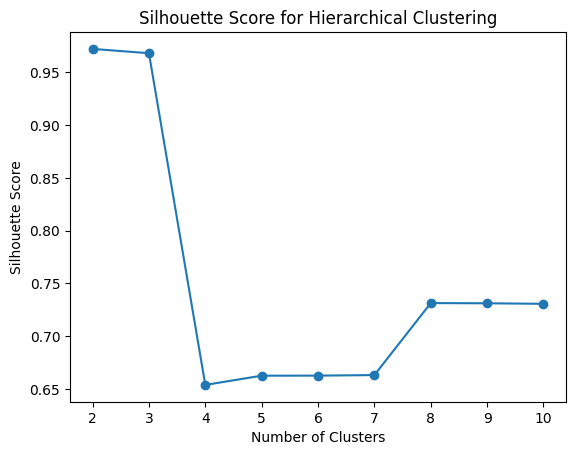

In [ ]:
# Define a range of cluster numbers to try
cluster_range = range(2, 11)  # You can adjust this range based on your needs

# Initialize lists to store silhouette scores and inertia values
silhouette_scores = []
inertia_values = []

# Loop through different numbers of clusters
for num_clusters in cluster_range:
    cluster = AgglomerativeClustering(n_clusters=num_clusters, metric='euclidean', linkage='ward')
    labels = cluster.fit_predict(X[['longitude_gps', 'latitude_gps']])

    # Compute silhouette score
    silhouette = silhouette_score(X[['longitude_gps', 'latitude_gps']], labels)
    silhouette_scores.append(silhouette)

# Plotting the silhouette scores
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title('Silhouette Score for Hierarchical Clustering')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [ ]:
silhouette_score(X[['longitude_gps', 'latitude_gps']], agg.labels_)

0.9680900550550018

Silhouette Score


* n_clusters=4 : 0.65374
* n_clusters=5 : 0.6624975786513678
* n_clusters=6 : 0.662555
* n_clusters=7 : 0.66307
* n_clusters=8 : 0.731294
* n_clusters=9 : 0.731113

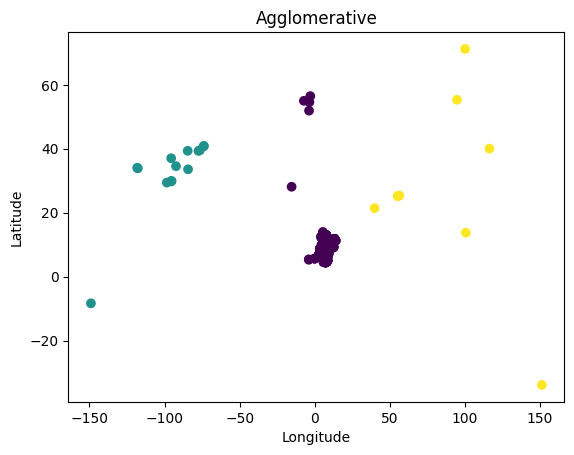

In [ ]:
plt.figure();

plt.scatter(X.iloc[:, 1], X.iloc[:, 2], c=agg.labels_);
plt.title("Agglomerative");
plt.xlabel('Longitude');
plt.ylabel('Latitude');

In [ ]:
# Merge the 'location_cluster' column from X to traindf based on 'customerid'
traindf = pd.merge(traindf, X[['customerid', 'location_cluster']], on='customerid', how='left')
traindf

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,referredby,good_bad_flag,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,employment_status_clients,level_of_education_clients,Age,employed,no_education_info,loan_amount_category,is_savings_account,loan_amount_to_total_due_ratio,daily_payment,has_branch_info,location_cluster
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25 08:22:56,2017-07-25 07:22:47,30000.0,34500.0,30,0,1,Other,3.432010,6.433055,Diamond Bank,Permanent,Post-Graduate,45,0,0,High,0,0.869565,1150.000000,0,0
1,8a85886e54beabf90154c0a29ae757c0,301965204,2,2017-07-05 17:04:41,2017-07-05 16:04:18,15000.0,17250.0,30,0,1,Savings,3.885298,7.320700,GT Bank,Permanent,Graduate,32,0,0,Medium,1,0.869565,575.000000,1,0
2,8a8588f35438fe12015444567666018e,301966580,7,2017-07-06 14:52:57,2017-07-06 13:52:51,20000.0,22250.0,15,0,1,Other,11.139350,10.292041,EcoBank,Permanent,Others,33,0,1,Medium,0,0.898876,1483.333333,0,0
3,8a85890754145ace015429211b513e16,301999343,3,2017-07-27 19:00:41,2017-07-27 18:00:35,10000.0,11500.0,15,0,1,Savings,3.985770,7.491708,First Bank,Permanent,Others,40,0,1,Low,1,0.869565,766.666667,0,0
4,8a858970548359cc0154883481981866,301962360,9,2017-07-03 23:42:45,2017-07-03 22:42:39,40000.0,44000.0,30,0,1,Other,7.457913,9.076574,GT Bank,Permanent,Primary,31,0,0,High,0,0.909091,1466.666667,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4363,8a858e6d58b0cc520158beeb14b22a5a,302003163,2,2017-07-30 09:19:42,2017-07-30 08:18:30,10000.0,13000.0,30,0,0,Savings,6.981903,4.785397,EcoBank,Permanent,Others,39,0,1,Low,1,0.769231,433.333333,0,0
4364,8a858ee85cf400f5015cf44ab1c42d5c,301998967,2,2017-07-27 15:35:47,2017-07-27 14:35:40,10000.0,13000.0,30,0,0,Savings,4.607358,8.460608,FCMB,Permanent,Others,28,0,1,Low,1,0.769231,433.333333,0,0
4365,8a858f365b2547f3015b284597147c94,301995576,3,2017-07-25 16:25:57,2017-07-25 15:24:47,10000.0,11500.0,15,0,0,Savings,3.976842,7.409129,First Bank,Permanent,Others,28,0,1,Low,1,0.869565,766.666667,0,0
4366,8a858f935ca09667015ca0ee3bc63f51,301977679,2,2017-07-14 13:50:27,2017-07-14 12:50:21,10000.0,13000.0,30,1,0,Savings,3.986089,7.386796,Skye Bank,Permanent,Others,27,0,1,Low,1,0.769231,433.333333,0,0


In [ ]:
traindf.location_cluster.value_counts()

0    4344
1      15
2       9
Name: location_cluster, dtype: int64

#New DateTime Features

In [ ]:
""" Error in Test dataset due to its format
# Extracting information from dates
traindf['approved_day'] = pd.to_datetime(traindf['approveddate']).dt.day
traindf['creation_day'] = pd.to_datetime(traindf['creationdate']).dt.day
traindf['approved_weekday'] = pd.to_datetime(traindf['approveddate']).dt.weekday
traindf['creation_weekday'] = pd.to_datetime(traindf['creationdate']).dt.weekday
traindf['approved_month'] = pd.to_datetime(traindf['approveddate']).dt.month
traindf['creation_month'] = pd.to_datetime(traindf['creationdate']).dt.month
"""

" Error in Test dataset due to its format\n# Extracting information from dates\ntraindf['approved_day'] = pd.to_datetime(traindf['approveddate']).dt.day\ntraindf['creation_day'] = pd.to_datetime(traindf['creationdate']).dt.day\ntraindf['approved_weekday'] = pd.to_datetime(traindf['approveddate']).dt.weekday\ntraindf['creation_weekday'] = pd.to_datetime(traindf['creationdate']).dt.weekday\ntraindf['approved_month'] = pd.to_datetime(traindf['approveddate']).dt.month\ntraindf['creation_month'] = pd.to_datetime(traindf['creationdate']).dt.month\n"

In [ ]:
""" Error in Test dataset due to its format
# Extracting the quarter of the year in which the loan was approved
traindf['approval_quarter'] = pd.to_datetime(traindf['approveddate']).dt.quarter
"""

" Error in Test dataset due to its format\n# Extracting the quarter of the year in which the loan was approved\ntraindf['approval_quarter'] = pd.to_datetime(traindf['approveddate']).dt.quarter\n"

In [ ]:
""" Error in Test dataset due to its format
# Extracting the month and year of loan approval
traindf['approval_month_year'] = pd.to_datetime(traindf['approveddate']).dt.to_period('M')
"""

" Error in Test dataset due to its format\n# Extracting the month and year of loan approval\ntraindf['approval_month_year'] = pd.to_datetime(traindf['approveddate']).dt.to_period('M')\n"

In [ ]:
# Creating a binary column indicating if the loan term is short or long
traindf['is_short_term'] = (traindf['termdays'] <= 30).astype(int)

In [ ]:
traindf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4368 entries, 0 to 4367
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   customerid                      4368 non-null   object        
 1   systemloanid                    4368 non-null   int64         
 2   loannumber                      4368 non-null   int64         
 3   approveddate                    4368 non-null   datetime64[ns]
 4   creationdate                    4368 non-null   datetime64[ns]
 5   loanamount                      4368 non-null   float64       
 6   totaldue                        4368 non-null   float64       
 7   termdays                        4368 non-null   int64         
 8   referredby                      4368 non-null   int64         
 9   good_bad_flag                   4368 non-null   int64         
 10  bank_account_type               4368 non-null   object        
 11  long

# Data Aggregation at Customer Level

Note: .astype(int): Converts the boolean array obtained into an integer array, where True becomes 1 and False becomes 0.

In [ ]:
trainprevcopy = trainprevloans.copy()

#grouping by 'customerid'
grouped_df = trainprevcopy.groupby('customerid')
grouped_df.head()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,closeddate,referredby,firstduedate,firstrepaiddate
0,8a2a81a74ce8c05d014cfb32a0da1049,301682320,2,2016-08-15 18:22:40,2016-08-15 17:22:32,10000.0,13000.0,30,2016-09-01 16:06:48,NaN,2016-09-14,2016-09-01 15:51:43
1,8a2a81a74ce8c05d014cfb32a0da1049,301883808,9,2017-04-28 18:39:07,2017-04-28 17:38:53,10000.0,13000.0,30,2017-05-28 14:44:49,NaN,2017-05-30,2017-05-26 00:00:00
2,8a2a81a74ce8c05d014cfb32a0da1049,301831714,8,2017-03-05 10:56:25,2017-03-05 09:56:19,20000.0,23800.0,30,2017-04-26 22:18:56,NaN,2017-04-04,2017-04-26 22:03:47
3,8a8588f35438fe12015444567666018e,301861541,5,2017-04-09 18:25:55,2017-04-09 17:25:42,10000.0,11500.0,15,2017-04-24 01:35:52,NaN,2017-04-24,2017-04-24 00:48:43
4,8a85890754145ace015429211b513e16,301941754,2,2017-06-17 09:29:57,2017-06-17 08:29:50,10000.0,11500.0,15,2017-07-14 21:18:43,NaN,2017-07-03,2017-07-14 21:08:35
...,...,...,...,...,...,...,...,...,...,...,...,...
18174,8a858fe25b8c4e5c015b8f61faf34239,301929936,3,2017-06-07 12:23:24,2017-06-07 11:23:17,15000.0,18375.0,30,2017-07-05 13:53:17,8a858fa75b5c94ed015b5ca7267d13f2,2017-07-07,2017-07-05 13:43:08
18175,8a858fe758dc437a0158eb12515362d4,301835353,1,2017-03-10 10:33:41,2017-03-10 09:33:34,10000.0,13000.0,30,2017-04-08 07:49:12,NaN,2017-04-10,2017-04-08 07:34:03
18176,8a858ff455a09f5a0155ba378c9b10bc,301674395,2,2016-08-09 11:55:35,2016-08-09 10:55:28,10000.0,13000.0,30,2016-09-08 11:24:08,NaN,2016-09-08,2016-09-08 11:09:05
18181,8a858f0656b7820c0156c92ca3ba436f,301697691,1,2016-08-27 20:03:45,2016-08-27 19:03:34,10000.0,13000.0,30,2016-10-15 10:17:54,NaN,2016-09-26,2016-10-15 10:02:45


In [ ]:
# Performing aggregations
aggregated_df = grouped_df.agg({
    'loanamount': ['sum', 'mean', 'median', 'max', 'min'],  # Various aggregations for loan amount
    'loannumber': 'count', # Counting the number of loans
    'totaldue': ['sum','mean'], #sum and mean of total due from all previous loans
    'termdays': ['max', 'min','mean'],  # Max, min and mean for term days
    # Add other aggregations as needed
}).reset_index()

# Flattening the MultiIndex in columns
aggregated_df.columns = ['_'.join(col).strip() for col in aggregated_df.columns.values]

#remove '_' from customerid column
aggregated_df.rename(columns= {'customerid_':'customerid'}, inplace= True)

# Displaying the first few rows of the aggregated DataFrame
aggregated_df.head()

aggregated_df.shape

,customerid,loanamount_sum,loanamount_mean,loanamount_median,loanamount_max,loanamount_min,loannumber_count,totaldue_sum,totaldue_mean,termdays_max,termdays_min,termdays_mean
0,8a1088a0484472eb01484669e3ce4e0b,10000.0,10000.000000,10000.0,10000.0,10000.0,1,11500.0,11500.000000,15,15,15.000000
1,8a1a1e7e4f707f8b014f797718316cad,70000.0,17500.000000,15000.0,30000.0,10000.0,4,89500.0,22375.000000,60,30,37.500000
2,8a1a32fc49b632520149c3b8fdf85139,90000.0,12857.142857,10000.0,20000.0,10000.0,7,106500.0,15214.285714,30,15,19.285714
3,8a1eb5ba49a682300149c3c068b806c7,130000.0,16250.000000,15000.0,30000.0,10000.0,8,162400.0,20300.000000,60,30,33.750000
4,8a1edbf14734127f0147356fdb1b1eb2,20000.0,10000.000000,10000.0,10000.0,10000.0,2,24500.0,12250.000000,30,15,22.500000


(4359, 12)

**Average interest and fees**

In [ ]:
# Calculate the time difference between 'totaldue' and 'loanamount'
trainprevcopy['average_interest'] = trainprevcopy['totaldue'] - trainprevcopy['loanamount']

# Group by 'customerid' and calculate the average interest
average_interest = trainprevcopy.groupby('customerid')['average_interest'].mean().reset_index()

# Display the result
average_interest

,customerid,average_interest
0,8a1088a0484472eb01484669e3ce4e0b,1500.000000
1,8a1a1e7e4f707f8b014f797718316cad,4875.000000
2,8a1a32fc49b632520149c3b8fdf85139,2357.142857
3,8a1eb5ba49a682300149c3c068b806c7,4050.000000
4,8a1edbf14734127f0147356fdb1b1eb2,2250.000000
...,...,...
4354,8a858fff5a28d297015a33bc2e845305,4266.666667
4355,8a858fff5a36fe68015a37f8550a02a2,3383.333333
4356,8a858fff5a36fe68015a3ac5851618ab,3000.000000
4357,8a858fff5a36fe68015a3b8dcb8a3843,2741.666667


**Average Loan Repayment Time**

In [ ]:
# Calculate the time difference between 'closeddate' and 'approveddate' in days
trainprevcopy['average_repayment_time'] = (trainprevcopy['closeddate'] - trainprevcopy['approveddate'])/np.timedelta64(1,'D')

# Group by 'customerid' and calculate the average time difference
average_repayment_time = trainprevcopy.groupby('customerid')['average_repayment_time'].mean().reset_index()

# Display the result
average_repayment_time

,customerid,average_repayment_time
0,8a1088a0484472eb01484669e3ce4e0b,22.063681
1,8a1a1e7e4f707f8b014f797718316cad,31.671001
2,8a1a32fc49b632520149c3b8fdf85139,18.846022
3,8a1eb5ba49a682300149c3c068b806c7,28.796515
4,8a1edbf14734127f0147356fdb1b1eb2,18.379734
...,...,...
4354,8a858fff5a28d297015a33bc2e845305,23.010997
4355,8a858fff5a36fe68015a37f8550a02a2,25.553852
4356,8a858fff5a36fe68015a3ac5851618ab,28.103183
4357,8a858fff5a36fe68015a3b8dcb8a3843,19.928376


**Early Repayment Flag**

This code calculates the difference in days between the 'closeddate' and 'approveddate' for each loan, and then checks if this duration is less than the 'termdays'. The resulting 'EarlyRepaymentFlag' is set to 1 if any loan meets this condition and 0 otherwise.

This is actually the average. If the customer closed date before the term date it is 1. If customer closed date before term date 50%of time it is 0.5.

In [ ]:
# Calculate the difference between 'closeddate' and 'creationdate'
trainprevcopy['repayment_duration'] = (trainprevcopy['closeddate'] - trainprevcopy['approveddate']).dt.days

# Create the 'EarlyRepaymentFlag' based on the condition
trainprevcopy['EarlyRepaymentFlag'] = (trainprevcopy['repayment_duration'] < trainprevcopy['termdays']).astype(int)

avg_EarlyRepaymentFlag = trainprevcopy.groupby('customerid')['EarlyRepaymentFlag'].mean().reset_index()

avg_EarlyRepaymentFlag

,customerid,EarlyRepaymentFlag
0,8a1088a0484472eb01484669e3ce4e0b,0.000000
1,8a1a1e7e4f707f8b014f797718316cad,0.500000
2,8a1a32fc49b632520149c3b8fdf85139,0.714286
3,8a1eb5ba49a682300149c3c068b806c7,0.875000
4,8a1edbf14734127f0147356fdb1b1eb2,1.000000
...,...,...
4354,8a858fff5a28d297015a33bc2e845305,1.000000
4355,8a858fff5a36fe68015a37f8550a02a2,0.500000
4356,8a858fff5a36fe68015a3ac5851618ab,1.000000
4357,8a858fff5a36fe68015a3b8dcb8a3843,0.833333


**LatePaymentFlag**

This code checks if the 'firstrepaiddate' is greater than the 'firstduedate' for each customer. If this condition is true, 'LatePaymentFlag' is set to 1, indicating that the customer has been late on a payment. Otherwise, it is set to 0.

In [ ]:
# Create the 'LatePaymentFlag' based on the condition
trainprevcopy['LatePaymentFlag'] = (trainprevcopy['firstrepaiddate'] > trainprevcopy['firstduedate']).astype(int)
avg_LatePaymentFlag = trainprevcopy.groupby('customerid')['LatePaymentFlag'].mean().reset_index()
avg_LatePaymentFlag

,customerid,LatePaymentFlag
0,8a1088a0484472eb01484669e3ce4e0b,1.000000
1,8a1a1e7e4f707f8b014f797718316cad,0.500000
2,8a1a32fc49b632520149c3b8fdf85139,0.571429
3,8a1eb5ba49a682300149c3c068b806c7,0.250000
4,8a1edbf14734127f0147356fdb1b1eb2,0.500000
...,...,...
4354,8a858fff5a28d297015a33bc2e845305,0.000000
4355,8a858fff5a36fe68015a37f8550a02a2,0.333333
4356,8a858fff5a36fe68015a3ac5851618ab,0.000000
4357,8a858fff5a36fe68015a3b8dcb8a3843,0.333333


In [ ]:
#Other features -- added Dec 7

# 1. Number of Loans Initiated on a Weekend
trainprevcopy['creation_weekend'] = trainprevcopy['creationdate'].dt.weekday >= 5
weekend_loans = trainprevcopy.groupby('customerid')['creation_weekend'].sum().reset_index()

# 2. Average Time to Approval
#Calculate the duration between creation date and approved date in hours
# First, find the total duration in seconds and then convert to hours
trainprevcopy['time_to_approval'] = (trainprevcopy['approveddate'] - trainprevcopy['creationdate']).dt.total_seconds() / 3600
average_time_to_approval = trainprevcopy.groupby('customerid')['time_to_approval'].mean().reset_index()

# 3. Average Time to First Repayment
trainprevcopy['time_to_first_repayment'] = (trainprevcopy['firstrepaiddate'] - trainprevcopy['approveddate']).dt.days
average_time_to_first_repayment = trainprevcopy.groupby('customerid')['time_to_first_repayment'].mean().reset_index()

# 4. Seasonality of Loan Activity
trainprevcopy['creation_month'] = trainprevcopy['creationdate'].dt.month
loan_activity_by_month = trainprevcopy.groupby('customerid')['creation_month'].apply(lambda x: x.mode()[0]).reset_index()



### Perform join on aggregated df to other aggregated dataframes

Add additional columns with calculated fields to aggregated_df (prev loan aggregated data)

In [ ]:
# Perform a left merge on each aggregated df to merge it to aggregated_df
#dfs = [average_interest, average_repayment_time, avg_EarlyRepaymentFlag, avg_LatePaymentFlag] # list of dataframes

aggregated_df = aggregated_df.merge(average_interest, on= 'customerid', how='left')
aggregated_df = aggregated_df.merge(average_repayment_time, on= 'customerid', how='left')
aggregated_df = aggregated_df.merge(avg_EarlyRepaymentFlag, on= 'customerid', how='left')
aggregated_df = aggregated_df.merge(avg_LatePaymentFlag, on= 'customerid', how='left')


aggregated_df = aggregated_df.merge(weekend_loans, on= 'customerid', how='left')
aggregated_df = aggregated_df.merge(average_time_to_approval, on= 'customerid', how='left')
aggregated_df = aggregated_df.merge(average_time_to_first_repayment, on= 'customerid', how='left')
aggregated_df = aggregated_df.merge(loan_activity_by_month, on= 'customerid', how='left')



aggregated_df.head(3)

,customerid,loanamount_sum,loanamount_mean,loanamount_median,loanamount_max,loanamount_min,loannumber_count,totaldue_sum,totaldue_mean,termdays_max,termdays_min,termdays_mean,average_interest,average_repayment_time,EarlyRepaymentFlag,LatePaymentFlag,creation_weekend,time_to_approval,time_to_first_repayment,creation_month
0,8a1088a0484472eb01484669e3ce4e0b,10000.0,10000.000000,10000.0,10000.0,10000.0,1,11500.0,11500.000000,15,15,15.000000,1500.000000,22.063681,0.000000,1.000000,1,1.018889,22.000000,7
1,8a1a1e7e4f707f8b014f797718316cad,70000.0,17500.000000,15000.0,30000.0,10000.0,4,89500.0,22375.000000,60,30,37.500000,4875.000000,31.671001,0.500000,0.500000,0,1.006319,29.500000,5
2,8a1a32fc49b632520149c3b8fdf85139,90000.0,12857.142857,10000.0,20000.0,10000.0,7,106500.0,15214.285714,30,15,19.285714,2357.142857,18.846022,0.714286,0.571429,0,1.005159,18.142857,3


#### Check the shape of the 2 dataframes before the merge

In [ ]:
print("Train demo+Perf: ",traindf.shape)
print("Aggregated: ",aggregated_df.shape)

Train demo+Perf:  (4368, 26)
Aggregated:  (4359, 20)


### Merge Train DF (demographic + current loans (traindemo, trainperf)) with the prev loan aggregation dataframe

In [ ]:
# Perform a left merge
train_aggregated_df = traindf.merge(aggregated_df, on='customerid', how = 'left')

In [ ]:
# Shifting ['good_bad_flag'] to end as per Andre's request
train_aggregated_df['good_bad_flag'] = train_aggregated_df.pop('good_bad_flag')

In [ ]:
#check shape of aggregated train df
train_aggregated_df.shape

(4368, 45)

In [ ]:
train_aggregated_df.head()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,referredby,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,employment_status_clients,level_of_education_clients,Age,employed,no_education_info,loan_amount_category,is_savings_account,loan_amount_to_total_due_ratio,daily_payment,has_branch_info,location_cluster,is_short_term,loanamount_sum,loanamount_mean,loanamount_median,loanamount_max,loanamount_min,loannumber_count,totaldue_sum,totaldue_mean,termdays_max,termdays_min,termdays_mean,average_interest,average_repayment_time,EarlyRepaymentFlag,LatePaymentFlag,creation_weekend,time_to_approval,time_to_first_repayment,creation_month,good_bad_flag
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25 08:22:56,2017-07-25 07:22:47,30000.0,34500.0,30,0,Other,3.432010,6.433055,Diamond Bank,Permanent,Post-Graduate,45,0,0,High,0,0.869565,1150.000000,0,0,1,200000.0,18181.818182,20000.0,30000.0,10000.0,11.0,242900.0,22081.818182,30.0,30.0,30.0,3900.0,29.964184,0.636364,0.363636,1.0,1.639949,29.272727,6.0,1
1,8a85886e54beabf90154c0a29ae757c0,301965204,2,2017-07-05 17:04:41,2017-07-05 16:04:18,15000.0,17250.0,30,0,Savings,3.885298,7.320700,GT Bank,Permanent,Graduate,32,0,0,Medium,1,0.869565,575.000000,1,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,8a8588f35438fe12015444567666018e,301966580,7,2017-07-06 14:52:57,2017-07-06 13:52:51,20000.0,22250.0,15,0,Other,11.139350,10.292041,EcoBank,Permanent,Others,33,0,1,Medium,0,0.898876,1483.333333,0,0,1,60000.0,10000.000000,10000.0,10000.0,10000.0,6.0,70500.0,11750.000000,30.0,15.0,17.5,1750.0,18.658920,0.833333,0.500000,2.0,1.002824,18.166667,1.0,1
3,8a85890754145ace015429211b513e16,301999343,3,2017-07-27 19:00:41,2017-07-27 18:00:35,10000.0,11500.0,15,0,Savings,3.985770,7.491708,First Bank,Permanent,Others,40,0,1,Low,1,0.869565,766.666667,0,0,1,20000.0,10000.000000,10000.0,10000.0,10000.0,2.0,24500.0,12250.000000,30.0,15.0,22.5,2250.0,31.841991,0.000000,1.000000,1.0,1.001944,31.500000,5.0,1
4,8a858970548359cc0154883481981866,301962360,9,2017-07-03 23:42:45,2017-07-03 22:42:39,40000.0,44000.0,30,0,Other,7.457913,9.076574,GT Bank,Permanent,Primary,31,0,0,High,0,0.909091,1466.666667,0,0,1,150000.0,18750.000000,20000.0,30000.0,10000.0,8.0,188400.0,23550.000000,60.0,30.0,37.5,4800.0,27.564702,1.000000,0.000000,2.0,1.002847,26.875000,1.0,1


In [ ]:
#check null after merge
train_aggregated_df.isnull().sum()

customerid                        0
systemloanid                      0
loannumber                        0
approveddate                      0
creationdate                      0
loanamount                        0
totaldue                          0
termdays                          0
referredby                        0
bank_account_type                 0
longitude_gps                     0
latitude_gps                      0
bank_name_clients                 0
employment_status_clients         0
level_of_education_clients        0
Age                               0
employed                          0
no_education_info                 0
loan_amount_category              0
is_savings_account                0
loan_amount_to_total_due_ratio    0
daily_payment                     0
has_branch_info                   0
location_cluster                  0
is_short_term                     0
loanamount_sum                    9
loanamount_mean                   9
loanamount_median           

In [ ]:
#Check rows having missing values
null_mask = train_aggregated_df.isnull().any(axis=1)
null_rows = train_aggregated_df[null_mask]
null_rows

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,referredby,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,employment_status_clients,level_of_education_clients,Age,employed,no_education_info,loan_amount_category,is_savings_account,loan_amount_to_total_due_ratio,daily_payment,has_branch_info,location_cluster,is_short_term,loanamount_sum,loanamount_mean,loanamount_median,loanamount_max,loanamount_min,loannumber_count,totaldue_sum,totaldue_mean,termdays_max,termdays_min,termdays_mean,average_interest,average_repayment_time,EarlyRepaymentFlag,LatePaymentFlag,creation_weekend,time_to_approval,time_to_first_repayment,creation_month,good_bad_flag
1,8a85886e54beabf90154c0a29ae757c0,301965204,2,2017-07-05 17:04:41,2017-07-05 16:04:18,15000.0,17250.0,30,0,Savings,3.885298,7.320700,GT Bank,Permanent,Graduate,32,0,0,Medium,1,0.869565,575.000000,1,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
303,8a76e7d443e6e97c0143ed0a13cb4f61,301999706,4,2017-07-28 00:12:31,2017-07-27 23:11:19,30000.0,39000.0,60,0,Savings,3.323364,6.606437,GT Bank,Permanent,Graduate,43,0,0,High,1,0.769231,650.000000,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2221,8a858e4357be1daf0157c96f4c915ef0,302001005,2,2017-07-28 17:15:11,2017-07-28 16:15:03,10000.0,11500.0,15,0,Savings,5.226327,7.596272,Diamond Bank,Permanent,Others,36,0,1,Low,1,0.869565,766.666667,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2949,8a858fda56562f8f01565f928f516cea,301998904,2,2017-07-27 14:38:40,2017-07-27 13:37:26,10000.0,13000.0,30,0,Savings,3.386796,6.462141,UBA,Permanent,Secondary,48,0,0,Low,1,0.769231,433.333333,1,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3262,8a5cfa8345d40fb80145dc328532397a,301974306,6,2017-07-12 10:24:49,2017-07-12 09:23:37,10000.0,11000.0,30,0,Other,3.349754,6.574360,First Bank,Permanent,Secondary,46,0,0,Low,0,0.909091,366.666667,1,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3389,8a858f6f57d2acb50157dca4f81540e2,301959311,2,2017-07-01 19:02:44,2017-07-01 18:01:36,10000.0,13000.0,30,0,Savings,3.334750,6.593899,GT Bank,Permanent,Graduate,48,0,0,Low,1,0.769231,433.333333,1,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3686,8a858ecc57b9184b0157c4ffc1b80614,301997744,2,2017-07-26 20:46:27,2017-07-26 19:46:20,10000.0,13000.0,30,0,Savings,3.235924,6.551645,First Bank,Permanent,Others,41,0,1,Low,1,0.769231,433.333333,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3776,8a858f9d5668e3f1015679951579076f,301990749,2,2017-07-22 13:13:25,2017-07-22 12:13:10,10000.0,11500.0,15,0,Savings,3.383453,6.533672,Diamond Bank,Permanent,Others,38,0,1,Low,1,0.869565,766.666667,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3849,8a858e69566ae5b801567ac352d84477,301992704,2,2017-07-24 05:32:11,2017-07-24 04:31:53,10000.0,13000.0,30,0,Savings,3.368366,7.121289,Wema Bank,Permanent,Others,36,0,1,Low,1,0.769231,433.333333,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [ ]:
train_aggregated_df.describe()

,systemloanid,loannumber,loanamount,totaldue,termdays,referredby,longitude_gps,latitude_gps,Age,employed,no_education_info,is_savings_account,loan_amount_to_total_due_ratio,daily_payment,has_branch_info,location_cluster,is_short_term,loanamount_sum,loanamount_mean,loanamount_median,loanamount_max,loanamount_min,loannumber_count,totaldue_sum,totaldue_mean,termdays_max,termdays_min,termdays_mean,average_interest,average_repayment_time,EarlyRepaymentFlag,LatePaymentFlag,creation_weekend,time_to_approval,time_to_first_repayment,creation_month,good_bad_flag
count,4.368000e+03,4368.000000,4368.000000,4368.000000,4368.000000,4368.000000,4368.000000,4368.000000,4368.000000,4368.000000,4368.000000,4368.000000,4368.000000,4368.000000,4368.000000,4368.000000,4368.000000,4359.000000,4359.000000,4359.000000,4359.000000,4359.000000,4359.000000,4359.000000,4359.000000,4359.000000,4359.000000,4359.000000,4359.000000,4359.000000,4359.000000,4359.000000,4359.000000,4359.000000,4359.000000,4359.000000,4368.000000
mean,3.019810e+08,5.172390,17809.065934,21257.377679,29.261676,0.134386,4.539944,7.253575,32.973214,0.084707,0.861493,0.782280,0.824546,743.581922,0.009844,0.007555,0.926740,68832.759807,12909.505679,12618.834595,16901.812342,9883.459509,4.171370,81647.063294,15639.865651,30.244322,21.493462,25.339400,2730.359972,23.224528,0.678757,0.364289,0.713925,1.058372,22.324566,4.910530,0.782051
std,1.343115e+04,3.653569,10749.694571,11943.510416,11.512519,0.341106,7.422612,2.988238,6.165971,0.278477,0.345471,0.412743,0.053084,329.590521,0.098740,0.107803,0.260593,88978.730980,4819.318228,5369.054150,10326.629581,961.488519,3.654823,102465.534864,5379.848948,12.307394,7.474564,6.866877,844.617995,9.402801,0.358869,0.374557,1.008712,0.665196,9.178344,2.101765,0.412900
min,3.019585e+08,2.000000,10000.000000,10000.000000,15.000000,0.000000,-149.033700,-33.868818,21.000000,0.000000,0.000000,0.000000,0.769231,366.666667,0.000000,0.000000,0.000000,5000.000000,5000.000000,5000.000000,5000.000000,3000.000000,1.000000,5750.000000,5750.000000,15.000000,15.000000,15.000000,750.000000,0.025903,0.000000,0.000000,0.000000,1.001111,0.000000,1.000000,0.000000
25%,3.019691e+08,2.000000,10000.000000,13000.000000,30.000000,0.000000,3.354974,6.474631,29.000000,0.000000,1.000000,1.000000,0.769231,433.333333,0.000000,0.000000,1.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000,13000.000000,12250.000000,30.000000,15.000000,20.000000,2137.500000,16.622564,0.500000,0.000000,0.000000,1.002639,16.000000,4.000000,1.000000
50%,3.019801e+08,4.000000,10000.000000,13000.000000,30.000000,0.000000,3.583420,6.622692,32.000000,0.000000,1.000000,1.000000,0.816327,766.666667,0.000000,0.000000,1.000000,30000.000000,10000.000000,10000.000000,10000.000000,10000.000000,3.000000,36000.000000,13000.000000,30.000000,15.000000,27.857143,3000.000000,23.485683,0.800000,0.285714,0.000000,1.004097,22.500000,5.000000,1.000000
75%,3.019935e+08,7.000000,20000.000000,24500.000000,30.000000,0.000000,6.533464,7.429028,37.000000,0.000000,1.000000,1.000000,0.869565,816.666667,0.000000,0.000000,1.000000,90000.000000,14285.714286,10000.000000,20000.000000,10000.000000,6.000000,108800.000000,17300.000000,30.000000,30.000000,30.000000,3000.000000,28.961157,1.000000,0.666667,1.000000,1.018611,28.000000,6.000000,1.000000
max,3.020040e+08,27.000000,60000.000000,68100.000000,90.000000,1.000000,151.209290,71.228069,56.000000,1.000000,1.000000,1.000000,1.000000,2090.000000,1.000000,2.000000,1.000000,770000.000000,36666.666667,40000.000000,60000.000000,30000.000000,26.000000,866300.000000,41252.380952,90.000000,60.000000,60.000000,9000.000000,151.439988,1.000000,1.000000,7.000000,37.121667,151.000000,12.000000,1.000000


In [ ]:
# List of customer IDs to update
customer_ids_to_update = [
    '8a85886e54beabf90154c0a29ae757c0',
    '8a76e7d443e6e97c0143ed0a13cb4f61',
    '8a858e4357be1daf0157c96f4c915ef0',
    '8a858fda56562f8f01565f928f516cea',
    '8a5cfa8345d40fb80145dc328532397a',
    '8a858f6f57d2acb50157dca4f81540e2',
    '8a858ecc57b9184b0157c4ffc1b80614',
    '8a858f9d5668e3f1015679951579076f',
    '8a858e69566ae5b801567ac352d84477'
]

In [ ]:
# Iterate through customer IDs and update the original DataFrame
for customer_id in customer_ids_to_update:
    matching_rows = train_aggregated_df[train_aggregated_df['customerid'] == customer_id]

    # Check if there are matching rows
    if not matching_rows.empty:
        original_idx = matching_rows.index[0]
        train_aggregated_df.at[original_idx, 'loanamount_sum'] = train_aggregated_df.at[original_idx, 'loanamount']
        train_aggregated_df.at[original_idx, 'loanamount_mean'] = train_aggregated_df.at[original_idx, 'loanamount']
        train_aggregated_df.at[original_idx, 'loanamount_median'] = train_aggregated_df.at[original_idx, 'loanamount']
        train_aggregated_df.at[original_idx, 'loanamount_max'] = train_aggregated_df.at[original_idx, 'loanamount']
        train_aggregated_df.at[original_idx, 'loanamount_min'] = train_aggregated_df.at[original_idx, 'loanamount']
        train_aggregated_df.at[original_idx, 'loannumber_count'] = train_aggregated_df.at[original_idx, 'loannumber']
        train_aggregated_df.at[original_idx, 'totaldue_sum'] = train_aggregated_df.at[original_idx, 'totaldue']
        train_aggregated_df.at[original_idx, 'totaldue_mean'] = train_aggregated_df.at[original_idx, 'totaldue']
        train_aggregated_df.at[original_idx, 'termdays_max'] = train_aggregated_df.at[original_idx, 'termdays']
        train_aggregated_df.at[original_idx, 'termdays_min'] = train_aggregated_df.at[original_idx, 'termdays']
        train_aggregated_df.at[original_idx, 'termdays_mean'] = train_aggregated_df.at[original_idx, 'termdays']
        train_aggregated_df.at[original_idx, 'average_interest'] = train_aggregated_df.at[original_idx, 'totaldue'] - train_aggregated_df.at[original_idx, 'loanamount']
        train_aggregated_df.at[original_idx, 'average_repayment_time'] = 23.485683 # using median values of average_repayment_time
        train_aggregated_df.at[original_idx, 'EarlyRepaymentFlag'] = 0.800000      # using median values of EarlyRepaymentFlag
        train_aggregated_df.at[original_idx, 'LatePaymentFlag'] = 0.285714         # using median values of LatePaymentFlag

        train_aggregated_df.at[original_idx, 'creation_weekend'] = 0.713925	 # using mean
        train_aggregated_df.at[original_idx, 'time_to_approval'] = 1.058372	      # using mean
        train_aggregated_df.at[original_idx, 'time_to_first_repayment'] = 22.324566	         # using mean
        train_aggregated_df.at[original_idx, 'creation_month'] = 4.910530	        # using mean


    else:
        print(f"No matching rows found for customer ID {customer_id}")

# Print the updated original DataFrame
train_aggregated_df.head()


,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,referredby,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,employment_status_clients,level_of_education_clients,Age,employed,no_education_info,loan_amount_category,is_savings_account,loan_amount_to_total_due_ratio,daily_payment,has_branch_info,location_cluster,is_short_term,loanamount_sum,loanamount_mean,loanamount_median,loanamount_max,loanamount_min,loannumber_count,totaldue_sum,totaldue_mean,termdays_max,termdays_min,termdays_mean,average_interest,average_repayment_time,EarlyRepaymentFlag,LatePaymentFlag,creation_weekend,time_to_approval,time_to_first_repayment,creation_month,good_bad_flag
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25 08:22:56,2017-07-25 07:22:47,30000.0,34500.0,30,0,Other,3.432010,6.433055,Diamond Bank,Permanent,Post-Graduate,45,0,0,High,0,0.869565,1150.000000,0,0,1,200000.0,18181.818182,20000.0,30000.0,10000.0,11.0,242900.0,22081.818182,30.0,30.0,30.0,3900.0,29.964184,0.636364,0.363636,1.000000,1.639949,29.272727,6.00000,1
1,8a85886e54beabf90154c0a29ae757c0,301965204,2,2017-07-05 17:04:41,2017-07-05 16:04:18,15000.0,17250.0,30,0,Savings,3.885298,7.320700,GT Bank,Permanent,Graduate,32,0,0,Medium,1,0.869565,575.000000,1,0,1,15000.0,15000.000000,15000.0,15000.0,15000.0,2.0,17250.0,17250.000000,30.0,30.0,30.0,2250.0,23.485683,0.800000,0.285714,0.713925,1.058372,22.324566,4.91053,1
2,8a8588f35438fe12015444567666018e,301966580,7,2017-07-06 14:52:57,2017-07-06 13:52:51,20000.0,22250.0,15,0,Other,11.139350,10.292041,EcoBank,Permanent,Others,33,0,1,Medium,0,0.898876,1483.333333,0,0,1,60000.0,10000.000000,10000.0,10000.0,10000.0,6.0,70500.0,11750.000000,30.0,15.0,17.5,1750.0,18.658920,0.833333,0.500000,2.000000,1.002824,18.166667,1.00000,1
3,8a85890754145ace015429211b513e16,301999343,3,2017-07-27 19:00:41,2017-07-27 18:00:35,10000.0,11500.0,15,0,Savings,3.985770,7.491708,First Bank,Permanent,Others,40,0,1,Low,1,0.869565,766.666667,0,0,1,20000.0,10000.000000,10000.0,10000.0,10000.0,2.0,24500.0,12250.000000,30.0,15.0,22.5,2250.0,31.841991,0.000000,1.000000,1.000000,1.001944,31.500000,5.00000,1
4,8a858970548359cc0154883481981866,301962360,9,2017-07-03 23:42:45,2017-07-03 22:42:39,40000.0,44000.0,30,0,Other,7.457913,9.076574,GT Bank,Permanent,Primary,31,0,0,High,0,0.909091,1466.666667,0,0,1,150000.0,18750.000000,20000.0,30000.0,10000.0,8.0,188400.0,23550.000000,60.0,30.0,37.5,4800.0,27.564702,1.000000,0.000000,2.000000,1.002847,26.875000,1.00000,1


In [ ]:
#check shape of aggregated train df
train_aggregated_df.shape

(4368, 45)

In [ ]:
#check null after merge
train_aggregated_df.isnull().sum()

customerid                        0
systemloanid                      0
loannumber                        0
approveddate                      0
creationdate                      0
loanamount                        0
totaldue                          0
termdays                          0
referredby                        0
bank_account_type                 0
longitude_gps                     0
latitude_gps                      0
bank_name_clients                 0
employment_status_clients         0
level_of_education_clients        0
Age                               0
employed                          0
no_education_info                 0
loan_amount_category              0
is_savings_account                0
loan_amount_to_total_due_ratio    0
daily_payment                     0
has_branch_info                   0
location_cluster                  0
is_short_term                     0
loanamount_sum                    0
loanamount_mean                   0
loanamount_median           

# Export the Cleaned Train Dataset

In [ ]:
# Set the CSV file names
train_aggregated_df_07_Dec_2023 = train_aggregated_df


cleaned_test = pathdata + "train_aggregated_df_07_Dec_2023.csv"
print(cleaned_test)

/content/drive/MyDrive/Colab Notebooks/Group Assignment - Zindi Competition/MMAI 869 Team Assignment Shared Google Folder/Data Cleaning/train_aggregated_df_07_Dec_2023.csv


In [ ]:
train_aggregated_df_07_Dec_2023.to_csv(cleaned_test, index=False)